### Change of firing rate during intensity sweep from 0.1 - 0.9

In [11]:
from braingeneers import analysis
import braingeneers.data.datasets_electrophysiology as ephys
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from braingeneers.analysis import plot
from braingeneers.analysis import single_unit

In [68]:
spt_folder = "/home/kang/disk/Opto/20230402_ucsf/2023_04_02_hc328_spt/"
rec_path = spt_folder + "2023_04_02_hc328_7.raw.h5"
curated_path = spt_folder + "2023_04_02_hc328_7_curated.zip"
file_name = "2023_04_02_hc328_7"

In [69]:
# spt_folder = "/home/kang/disk/Opto/20230402_ucsf/"
# file_name = "2023_04_04_hc328_hckcr1-2_0.raw.h5"
# rec_path = spt_folder + file_name
# curated_path = spt_folder + "2023_04_04_hc328_hckcr1-2_0_phy.zip" #/" + file_name.split(".raw")[0]+"_curated.zip"

In [70]:
spike_data = analysis.read_phy_files(curated_path)
stim_pairs_bi = ephys.load_gpio_maxwell(rec_path)
print(stim_pairs_bi)
print(stim_pairs_bi.shape)
print(spike_data.length/1000)

[[ 10.0259   20.02585]
 [ 30.0565   40.0565 ]
 [ 50.0912   60.09115]
 [ 70.11675  80.1167 ]
 [ 90.1471  100.14705]
 [110.17585 120.1758 ]
 [130.20695 140.2069 ]
 [150.2435  160.2435 ]
 [170.28045 180.28045]]
(9, 2)
190.247


In [71]:
bins, firing_rate = analysis.moving_fr_rate(spike_data.train, bin_size=100)

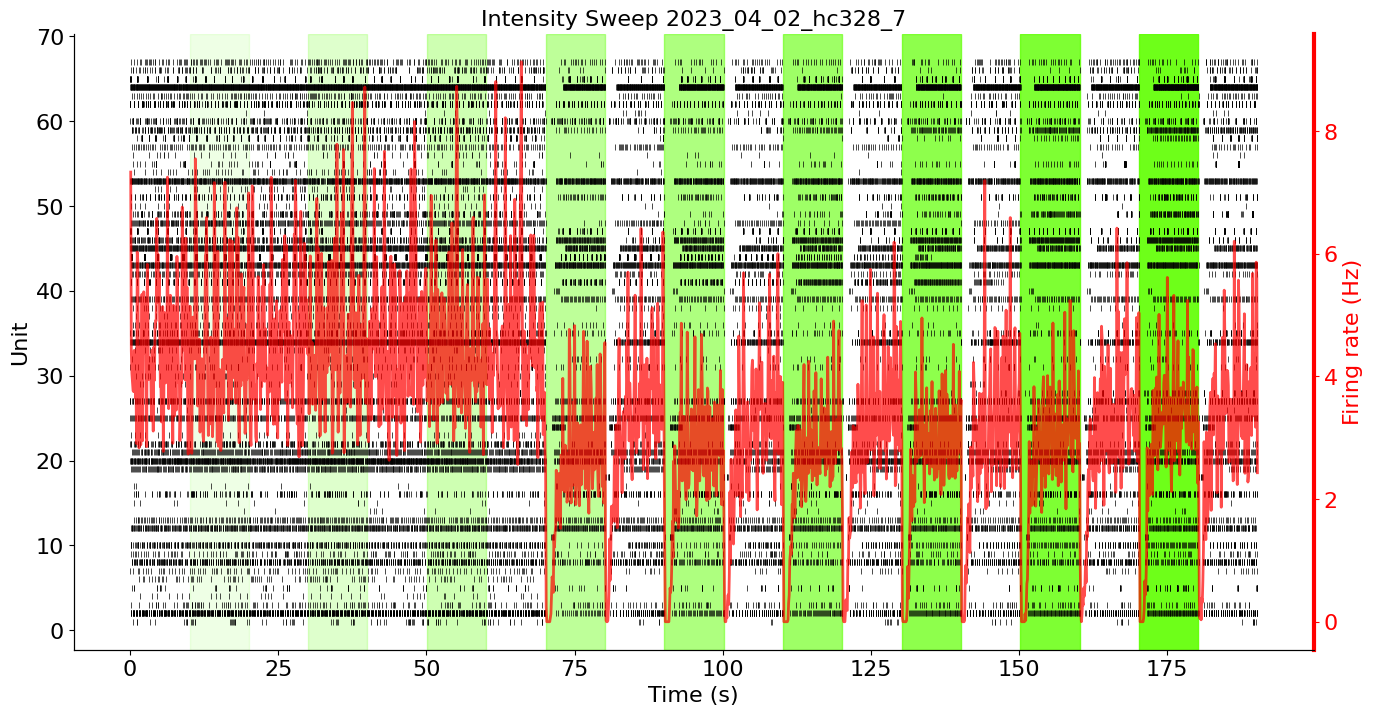

In [72]:
### plot intensity raster 
fig, axs = plt.subplots(1, 1, figsize=(16, 8))
fig.set_facecolor('white')
count = 0
for i in range(spike_data.N):
    yy = [i+1] * len(spike_data.train[i])
    axs.scatter(np.asarray(spike_data.train[i])/1000.0, yy, marker="|", s=15, 
                linewidth=0.5, color='k', zorder=10)
for e in range(len(stim_pairs_bi)):  # 5EFF00 - 530 nm green, #00C0FF - xnm blue
    stim = stim_pairs_bi[e]
    axs.axvspan(stim[0], stim[1], color="#5EFF00", alpha=0.1*(e+1), zorder=1)
axs.set_ylabel("Unit", fontsize=16)
axs.set_xlabel("Time (s)", fontsize=16)
axs.yaxis.set_tick_params(labelsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.set_title("Intensity Sweep {}".format(file_name), fontsize=16)
axs.spines['top'].set_visible(False)

axs1 = axs.twinx()
axs1.plot(bins[1:]/1000.0, firing_rate, linewidth=2, color='r', alpha=0.7)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
# axs1.yaxis.set_major_locator(MaxNLocator(integer=True))
axs1.set_ylabel("Firing rate (Hz)", fontsize=16, color='r')
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.spines['top'].set_visible(False)
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.tick_params(axis='y', colors='r')
# axs1.set_xlim(30, 90)
# axs1.set_ylim(-0.5, 16)
plt.savefig("intensity_sweep_{}.svg".format(file_name), dpi=300)
plt.savefig("intensity_sweep_{}.png".format(file_name), transparent=True, dpi=300)



In [73]:
subtime_points = np.concatenate((np.array([0]), 
                                 np.hstack(stim_pairs_bi), 
                                 np.array([spike_data.length/1000])), axis=None)
print(subtime_points)

[  0.       10.0259   20.02585  30.0565   40.0565   50.0912   60.09115
  70.11675  80.1167   90.1471  100.14705 110.17585 120.1758  130.20695
 140.2069  150.2435  160.2435  170.28045 180.28045 190.247  ]


In [74]:
subtime_rates = np.zeros(shape=(len(subtime_points)-1, spike_data.N))
for i in range(1, len(subtime_points)):
    start, end = subtime_points[i-1] * 1000.0, subtime_points[i] * 1000.0
    sub_data = spike_data.subtime(start, end)
    rate_hz = [len(train) / ((end - start) / 1000.0) for train in sub_data.train]
    # print(len(rate_hz), max(rate_hz), min(rate_hz), np.std(rate_hz, ddof=1)/np.sqrt(np.size(rate_hz)))
    subtime_rates[i-1] = np.copy(rate_hz)

In [75]:
import scipy
xx = np.arange(0, len(subtime_points)-1, 1)
yy = [np.mean(rates) for rates in subtime_rates]
ystd = [np.std(rates) for rates in subtime_rates]
ysem = [scipy.stats.sem(rates) for rates in subtime_rates]
yerr = [np.std(rates, ddof=1)/np.sqrt(np.size(rates)) for rates in subtime_rates]
intensity = np.arange(0.1, 1, 0.1)
print(len(intensity))
print(len(xx), len(yy))
print(yerr)
print(ysem)
print(ystd)

9
19 19
[0.5507377632546109, 0.5567432097519387, 0.5545604601960704, 0.5753051850524294, 0.5835530510684727, 0.5864133295323282, 0.5740195926005992, 0.4212155506787479, 0.45726188854692357, 0.4205464773615337, 0.4251271158000795, 0.4138263453680337, 0.4422901990642036, 0.4272102043640002, 0.43021277877300795, 0.46008276552200095, 0.4462563813574848, 0.4865599497790594, 0.46744881183174875]
[0.5507377632546109, 0.5567432097519387, 0.5545604601960704, 0.5753051850524294, 0.5835530510684727, 0.5864133295323282, 0.5740195926005992, 0.4212155506787479, 0.45726188854692357, 0.4205464773615337, 0.4251271158000795, 0.4138263453680337, 0.4422901990642036, 0.4272102043640002, 0.43021277877300795, 0.46008276552200095, 0.4462563813574848, 0.4865599497790594, 0.46744881183174875]
[4.474214739563767, 4.523003217545044, 4.505270476325468, 4.673801417752135, 4.740807398022762, 4.764044410111078, 4.663357215300756, 3.4219713103440323, 3.7148131435315754, 3.416535733019468, 3.4537490156119652, 3.3619411

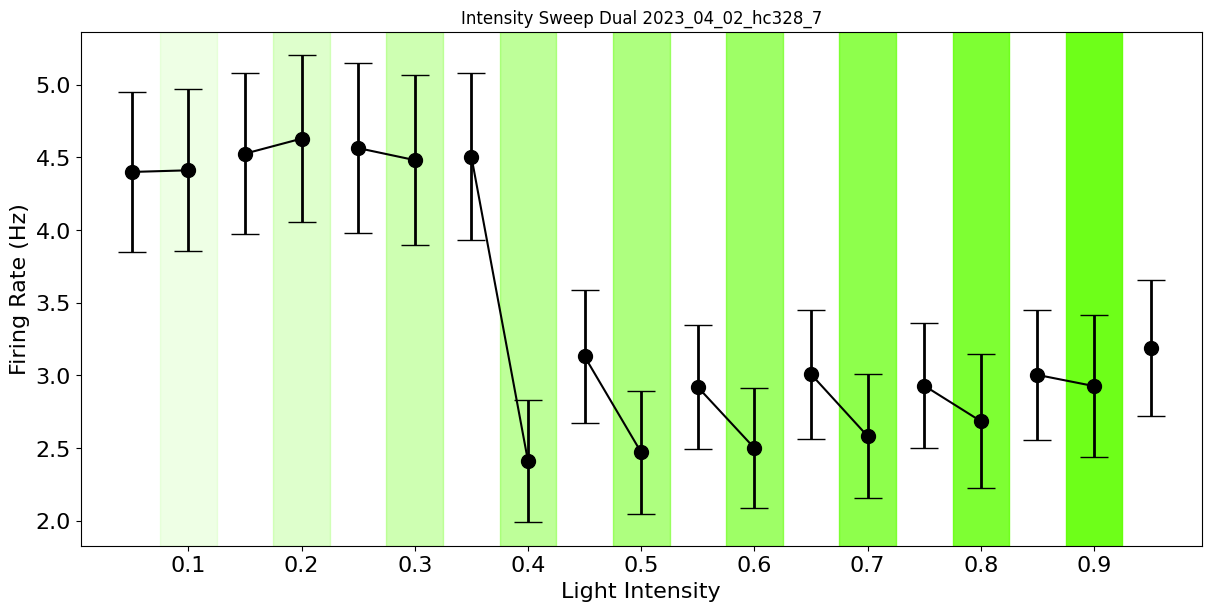

In [78]:
### plot mean with error
fig, axs = plt.subplots(figsize = (12, 6), constrained_layout=True)
axs.set_title("Intensity Sweep Dual {}".format(file_name))
(_, caps, _) =  axs.errorbar(xx, yy, yerr=yerr, fmt='o', linewidth=2, markersize=10, capsize=10, color='k')
for cap in caps:
    cap.set_markeredgewidth(1)
for i in range(1, len(xx), 2):
    axs.plot([xx[i-1], xx[i]], [yy[i-1], yy[i]], color='k')

for i in range(1, len(intensity)+1):
    j = 2*i-1
    axs.axvspan(xx[j]-0.5, xx[j]+0.5, color="#5EFF00", alpha=intensity[i-1])
axs.set_xticks(xx[1::2])
axs.set_xticklabels([np.round(inten,1) for inten in intensity])
axs.set_xlabel("Light Intensity", fontsize=16)
axs.set_ylabel("Firing Rate (Hz)", fontsize=16)
axs.xaxis.set_tick_params(labelsize=16)
axs.yaxis.set_tick_params(labelsize=16)
plt.savefig("figure4/Intensity_Sweep_Dual_{}.png".format(file_name), dpi=300)
plt.savefig("figure4/Intensity_Sweep_Dual_{}.svg".format(file_name), dpi=300)

# #### Firing rate of stim only to light
# xxs = xx[1::2]
# yys = yy[1::2]
# yerrs = yerr[1::2]
# fig, axs = plt.subplots(figsize = (12,6), constrained_layout=True)
# axs.set_title("Intensity Sweep Stim Only {}".format(file_name))
# (_, caps, _) =  axs.errorbar(xxs, yys, yerr=yerrs, fmt='o', linewidth=2, markersize=10, capsize=10, color='k')
# for cap in caps:
#     cap.set_markeredgewidth(1)

# # for i in range(1, len(intensity)+1):
# #     axs.axvspan(xx[j]-0.5, xx[j]+0.5, color="#5EFF00", alpha=intensity[i-1])
# axs.set_xticks(xxs)
# axs.set_xticklabels([np.round(inten,1) for inten in intensity])
# axs.set_xlabel("Light Intensity", fontsize=16)
# axs.set_ylabel("Firing Rate (Hz)", fontsize=16)
# axs.xaxis.set_tick_params(labelsize=16)
# axs.yaxis.set_tick_params(labelsize=16)
# plt.savefig("figure4/Intensity_Sweep_Stim_only_{}.png".format(file_name), transparent=True, dpi=300)
# plt.savefig("figure4/Intensity_Sweep_Stim_Only_{}.svg".format(file_name), dpi=300)

# print(yy)
# print(yys)
